<a href="https://colab.research.google.com/github/koushikroy/facial_sentiment_analysis/blob/main/03_sentiment_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Comment:**



*   In this notebook I'm going to try SVC and KNN in the top 20 feature dataset and see if the result improves or not 




# Imports

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Dateset Loading and Preprocessing

## Downloading Dataset

In [4]:
!wget https://raw.githubusercontent.com/koushikroy/facial_sentiment_analysis/main/dataset/imp_fea_dataset_20.csv

--2021-07-12 12:49:40--  https://raw.githubusercontent.com/koushikroy/facial_sentiment_analysis/main/dataset/imp_fea_dataset_20.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148719 (145K) [text/plain]
Saving to: ‘imp_fea_dataset_20.csv’

imp_fea_dataset_20. 100%[===================>] 145.23K  --.-KB/s    in 0.02s   

2021-07-12 12:49:40 (6.27 MB/s) - ‘imp_fea_dataset_20.csv’ saved [148719/148719]



## Exploring and Cleaning 

In [5]:
sentiment_data_original = pd.read_csv('/content/imp_fea_dataset_20.csv')

In [6]:
sentiment_data_original.head(10)

,Unnamed: 0,11y,339y,110y,17y,18y,68y,16y,67y,298y,316y,86y,315y,106y,297y,85y,317y,87y,15y,108y,66y,output
0,0,0.087810,0.086514,0.093708,0.701211,0.716253,0.108578,0.686886,0.234690,0.095875,0.696938,0.699335,0.712851,0.234497,0.225658,0.715577,0.683342,0.685688,0.675410,0.238876,0.260274,0
1,1,0.098683,0.098165,0.104281,0.664070,0.679439,0.119037,0.650274,0.250426,0.107617,0.660159,0.663162,0.676266,0.250525,0.238674,0.679406,0.647318,0.649850,0.639768,0.252469,0.275065,0
2,2,0.085394,0.084500,0.091048,0.660387,0.674604,0.105700,0.647303,0.229239,0.093703,0.656849,0.658943,0.672119,0.230414,0.219152,0.674397,0.644289,0.646311,0.637065,0.231457,0.253444,0
3,3,0.075667,0.071821,0.084392,0.665309,0.682307,0.101926,0.649277,0.217908,0.078597,0.659706,0.664673,0.677375,0.219089,0.198675,0.682582,0.644042,0.648405,0.636364,0.220197,0.242033,0
4,4,0.113934,0.112442,0.119322,0.645588,0.660449,0.132435,0.632069,0.263147,0.119717,0.641322,0.643500,0.656761,0.258085,0.251820,0.659018,0.628381,0.630256,0.621487,0.269695,0.286610,0
5,5,0.105900,0.106563,0.108988,0.661223,0.675959,0.120718,0.648267,0.248628,0.116267,0.656643,0.658676,0.672033,0.244758,0.247309,0.674185,0.644369,0.646127,0.638024,0.255063,0.272159,0
6,6,0.099532,0.098031,0.106373,0.653690,0.670160,0.121788,0.637311,0.239193,0.106595,0.649049,0.651303,0.665722,0.238758,0.225563,0.668261,0.632857,0.634872,0.623896,0.241503,0.261039,0
7,7,0.132543,0.134719,0.135822,0.684434,0.699993,0.148933,0.669732,0.271535,0.147137,0.682313,0.681170,0.698798,0.269407,0.273520,0.697573,0.667722,0.666632,0.658063,0.276534,0.294167,0
8,8,0.098754,0.096432,0.107331,0.649633,0.665465,0.125465,0.636273,0.242242,0.105834,0.645583,0.649364,0.662180,0.245374,0.226565,0.666231,0.633000,0.636508,0.626721,0.242127,0.265762,0
9,9,0.097765,0.100790,0.100608,0.647373,0.662741,0.114101,0.634641,0.237549,0.114427,0.643921,0.644608,0.660043,0.236732,0.237291,0.660783,0.631525,0.632178,0.625103,0.242333,0.261588,0



**From the dataset, we can see that:**
*   There are in total 21 Columns excluding the index column 
*   The first 21 columns represents the most important landmark points in the face and the 'output' column represnts the emotion
*   The face has been cropped and resized thus no need for further normalization



In [7]:
sentiment_data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  387 non-null    int64  
 1   11y         387 non-null    float64
 2   339y        387 non-null    float64
 3   110y        387 non-null    float64
 4   17y         387 non-null    float64
 5   18y         387 non-null    float64
 6   68y         387 non-null    float64
 7   16y         387 non-null    float64
 8   67y         387 non-null    float64
 9   298y        387 non-null    float64
 10  316y        387 non-null    float64
 11  86y         387 non-null    float64
 12  315y        387 non-null    float64
 13  106y        387 non-null    float64
 14  297y        387 non-null    float64
 15  85y         387 non-null    float64
 16  317y        387 non-null    float64
 17  87y         387 non-null    float64
 18  15y         387 non-null    float64
 19  108y        387 non-null    f

In [8]:
#value_count in the output column 
sentiment_data_original['output'].value_counts()

7    83
4    69
5    60
2    59
0    45
6    28
3    25
1    18
Name: output, dtype: int64



> So you can see that the neutral category has a staggering number of input compared to othet categories. This can be a later as the model might be overflitted. So, we need to take care of this.



In [9]:
sentiment_data_small_version = sentiment_data_original
sentiment_data_small_version

,Unnamed: 0,11y,339y,110y,17y,18y,68y,16y,67y,298y,316y,86y,315y,106y,297y,85y,317y,87y,15y,108y,66y,output
0,0,0.087810,0.086514,0.093708,0.701211,0.716253,0.108578,0.686886,0.234690,0.095875,0.696938,0.699335,0.712851,0.234497,0.225658,0.715577,0.683342,0.685688,0.675410,0.238876,0.260274,0
1,1,0.098683,0.098165,0.104281,0.664070,0.679439,0.119037,0.650274,0.250426,0.107617,0.660159,0.663162,0.676266,0.250525,0.238674,0.679406,0.647318,0.649850,0.639768,0.252469,0.275065,0
2,2,0.085394,0.084500,0.091048,0.660387,0.674604,0.105700,0.647303,0.229239,0.093703,0.656849,0.658943,0.672119,0.230414,0.219152,0.674397,0.644289,0.646311,0.637065,0.231457,0.253444,0
3,3,0.075667,0.071821,0.084392,0.665309,0.682307,0.101926,0.649277,0.217908,0.078597,0.659706,0.664673,0.677375,0.219089,0.198675,0.682582,0.644042,0.648405,0.636364,0.220197,0.242033,0
4,4,0.113934,0.112442,0.119322,0.645588,0.660449,0.132435,0.632069,0.263147,0.119717,0.641322,0.643500,0.656761,0.258085,0.251820,0.659018,0.628381,0.630256,0.621487,0.269695,0.286610,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,382,0.042583,0.045035,0.047134,0.728669,0.748919,0.062893,0.707321,0.178650,0.058560,0.721632,0.724311,0.740879,0.176057,0.173938,0.743858,0.699588,0.702000,0.688762,0.186769,0.203422,7
383,383,0.098089,0.100955,0.099325,0.832645,0.848669,0.109465,0.813827,0.206665,0.113173,0.823182,0.825677,0.837476,0.205407,0.215514,0.840209,0.804069,0.806298,0.795116,0.216277,0.229719,7
384,384,0.030021,0.038381,0.029579,0.775125,0.792937,0.042556,0.756839,0.139110,0.059267,0.768600,0.766205,0.784894,0.141035,0.154036,0.782447,0.749900,0.747969,0.740024,0.148157,0.164470,7
385,385,0.029790,0.032586,0.032786,0.803435,0.821342,0.046595,0.783120,0.149567,0.046569,0.795293,0.795607,0.811954,0.149780,0.150114,0.812003,0.774113,0.774908,0.763476,0.158602,0.175099,7


In [10]:
sentiment_data_small_version['output'].value_counts()

7    83
4    69
5    60
2    59
0    45
6    28
3    25
1    18
Name: output, dtype: int64

## Mapping The Output Column

In [11]:
# mapping already done .. 
# the CSV comes with mapped data
input_df_copy = sentiment_data_small_version

## Train Test Split

In [12]:
X = input_df_copy.drop("output", axis=1)
X = X.drop("Unnamed: 0", axis=1)
X

,11y,339y,110y,17y,18y,68y,16y,67y,298y,316y,86y,315y,106y,297y,85y,317y,87y,15y,108y,66y
0,0.087810,0.086514,0.093708,0.701211,0.716253,0.108578,0.686886,0.234690,0.095875,0.696938,0.699335,0.712851,0.234497,0.225658,0.715577,0.683342,0.685688,0.675410,0.238876,0.260274
1,0.098683,0.098165,0.104281,0.664070,0.679439,0.119037,0.650274,0.250426,0.107617,0.660159,0.663162,0.676266,0.250525,0.238674,0.679406,0.647318,0.649850,0.639768,0.252469,0.275065
2,0.085394,0.084500,0.091048,0.660387,0.674604,0.105700,0.647303,0.229239,0.093703,0.656849,0.658943,0.672119,0.230414,0.219152,0.674397,0.644289,0.646311,0.637065,0.231457,0.253444
3,0.075667,0.071821,0.084392,0.665309,0.682307,0.101926,0.649277,0.217908,0.078597,0.659706,0.664673,0.677375,0.219089,0.198675,0.682582,0.644042,0.648405,0.636364,0.220197,0.242033
4,0.113934,0.112442,0.119322,0.645588,0.660449,0.132435,0.632069,0.263147,0.119717,0.641322,0.643500,0.656761,0.258085,0.251820,0.659018,0.628381,0.630256,0.621487,0.269695,0.286610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.042583,0.045035,0.047134,0.728669,0.748919,0.062893,0.707321,0.178650,0.058560,0.721632,0.724311,0.740879,0.176057,0.173938,0.743858,0.699588,0.702000,0.688762,0.186769,0.203422
383,0.098089,0.100955,0.099325,0.832645,0.848669,0.109465,0.813827,0.206665,0.113173,0.823182,0.825677,0.837476,0.205407,0.215514,0.840209,0.804069,0.806298,0.795116,0.216277,0.229719
384,0.030021,0.038381,0.029579,0.775125,0.792937,0.042556,0.756839,0.139110,0.059267,0.768600,0.766205,0.784894,0.141035,0.154036,0.782447,0.749900,0.747969,0.740024,0.148157,0.164470
385,0.029790,0.032586,0.032786,0.803435,0.821342,0.046595,0.783120,0.149567,0.046569,0.795293,0.795607,0.811954,0.149780,0.150114,0.812003,0.774113,0.774908,0.763476,0.158602,0.175099


In [13]:
# Create X & y

y = input_df_copy["output"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
len(y_train), len(y_test)

(309, 78)

# Model Declaration and Training

## Model 1

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
def knn_model(n_neighbors=3):
    knn_1 = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_1.fit(X_train, y_train)
    return knn_1.score(X_test, y_test)

In [22]:
score_values = []
for i in range(2,20,1):
    model_score = knn_model(i)
    score_values.append(model_score)
    print(f'N_neibours: {i}, Model Score: {model_score}')

N_neibours: 2, Model Score: 0.47435897435897434
N_neibours: 3, Model Score: 0.5512820512820513
N_neibours: 4, Model Score: 0.5
N_neibours: 5, Model Score: 0.5769230769230769
N_neibours: 6, Model Score: 0.5384615384615384
N_neibours: 7, Model Score: 0.5128205128205128
N_neibours: 8, Model Score: 0.5512820512820513
N_neibours: 9, Model Score: 0.5641025641025641
N_neibours: 10, Model Score: 0.5512820512820513
N_neibours: 11, Model Score: 0.5384615384615384
N_neibours: 12, Model Score: 0.5384615384615384
N_neibours: 13, Model Score: 0.5384615384615384
N_neibours: 14, Model Score: 0.5512820512820513
N_neibours: 15, Model Score: 0.5384615384615384
N_neibours: 16, Model Score: 0.5128205128205128
N_neibours: 17, Model Score: 0.5256410256410257
N_neibours: 18, Model Score: 0.48717948717948717
N_neibours: 19, Model Score: 0.48717948717948717


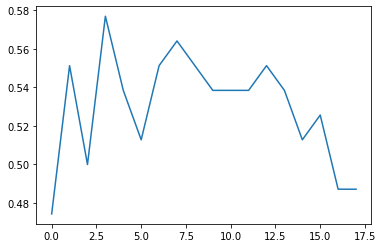

In [27]:
plt.plot(score_values)